# **Tugas Praktikum Mandiri 05**
Revani - 0110224111

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghubungkan dengan Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Praktikum05"

# Loading Dataset

In [4]:
# Membaca data file CSV
df = pd.read_csv(path + '/Data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Menampilkan informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Preprocessing

In [7]:
# cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [9]:
# memeriksa dan menghapus duplikat
print("Jumlah data duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

Jumlah data duplikat: 0


# Menentukan Fitur dan Target

In [10]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 4)
y shape: (150,)


# Membagi Data Training dan Dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(120, 30)

# Membuat dan Melatih Model Decision Tree

In [15]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Menampilkan informasi model yang sudah terlatih
print("Model Decision Tree telah dilatih dengan parameter:")
print(model)

Model Decision Tree telah dilatih dengan parameter:
DecisionTreeClassifier(max_depth=4, random_state=42)


# Melakukan Prediksi dan Evaluasi

In [16]:
y_pred = model.predict(X_test)

print("Akurasi model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi model: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Visualisasi Hasil Model Decision Tree

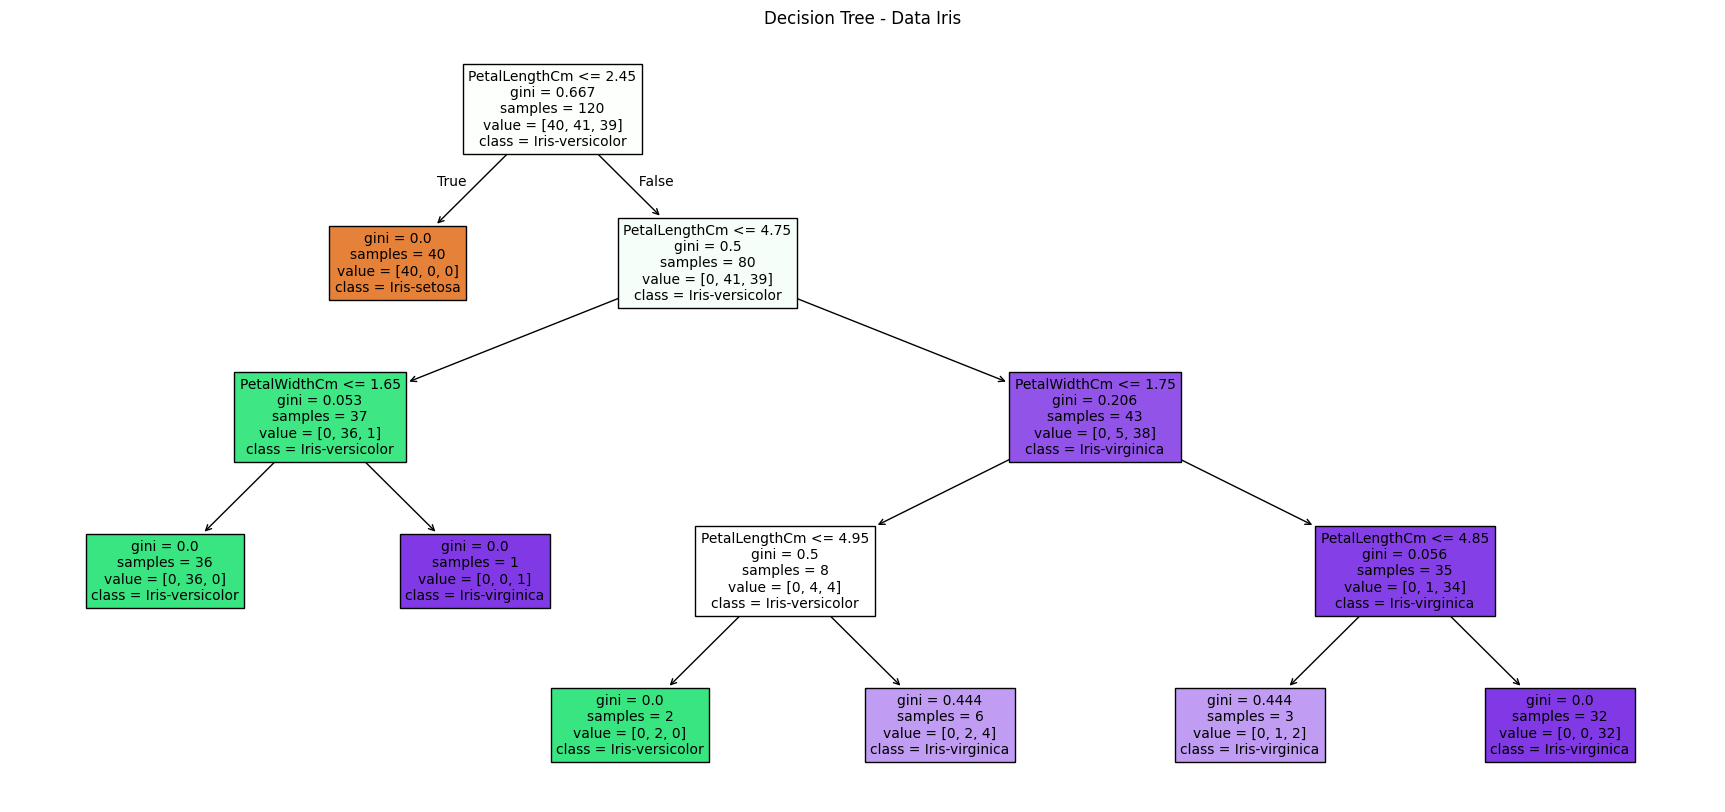

In [20]:
plt.figure(figsize=(22,10))
plot_tree (
    model,
    feature_names=X.columns,
    class_names=model.classes_,
    filled=True,
    fontsize=10
    )
plt.title("Decision Tree - Data Iris")
plt.show()